In [1]:
import numpy as np
import torch
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
image = np.asarray(Image.open('../example-cityscapes/aachen/aachen_000000_000019_leftImg8bit.png'))

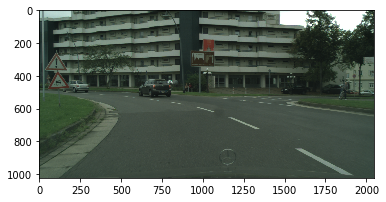

In [3]:
plt.imshow(image)

In [4]:
class RandomCrop(object):
    """Crop randomly the image in a sample.

    Taken from: https://pytorch.org/tutorials/beginner/data_loading_tutorial.html

    :arg output_size (width, height) tuple
    """

    def __init__(self, output_size: (int, int)):
        assert isinstance(output_size, tuple)
        assert len(output_size) == 2
        self.output_size = output_size

    def __call__(self, image):
        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        return image[top: top + new_h, left: left + new_w]

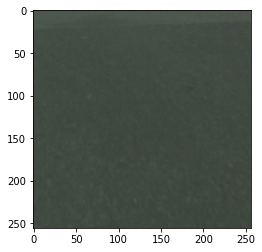

In [5]:
crop = RandomCrop((256,256))
plt.imshow(crop(image))

In [6]:
class RandomHorizontalFlip(object):
    """Flips the tensor horizontally with probability 1/2."""

    def __call__(self, image):
        if np.random.rand() < 0.5:
            return np.flip(image, axis=-2)

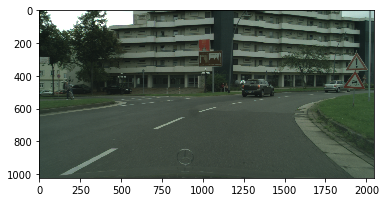

In [9]:
flip = RandomHorizontalFlip()
plt.imshow(flip(image))

In [10]:
image.shape

(1024, 2048, 3)